In [0]:
#We are going to load a datset from Scikit learn Library sklearn
from sklearn.datasets import load_boston

## Import Libraries

In [0]:
#Numpy is a numerical Library in pyhon used for dimmensional arrays
import numpy as np
#Pandas is used for Data Manipulation
import pandas as pd
#Matplot is a library used for plotting graphs
import matplotlib.pyplot as plt


In [0]:
#Load the dataset
df = load_boston()

## Preview the Data

In [0]:
#Observe the data
df

The data is not arranged hence we will put it in a Dataframe

In [8]:
#Our dataframe  will be called dataset
dataset = pd.DataFrame(df.data)
#Preview the first 5 entries of the data
print(dataset.head())

        0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]


In [0]:
#Assign feature names to all 
dataset.columns = df.feature_names

In [11]:
#Preview our data again with the feature names now
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
#Dependent feature
df.target.shape

(506,)

In [0]:
#We will create a new column and call it Price and put our target variable here.
dataset['Price'] = df.target

In [14]:
#We will preview our data again to see if the changes have taken place
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Put Data in atrributes and labels

In [0]:
#This involves distributing our data in independent and dependent features.
X = dataset.iloc[:,:-1] #Independent features. 
#The negative 1 means taking all datasets except the last one
y=  dataset.iloc[:,-1]
#This means , picking the last one only.

## Linear Regression

In [0]:
#We will first import the Linear Regression as fllows:
from sklearn.linear_model import LinearRegression

In [0]:
#We will import Cross Vsl score thst is used to do cross validation
#We will specify the number of validations afterwards
from sklearn.model_selection import cross_val_score


In [0]:
lin_regressor = LinearRegression()
#our Cross validations will be 5
#All the mean Squared errors, we will put them as a negative value.
mse = cross_val_score(lin_regressor, X,y , scoring ='neg_mean_squared_error', cv =5)
#The more the value is nearer to zero , the more the model becomes right.

In [26]:
#This is the mean of the 5 cross validations(5 experiments)
mean_mse = np.mean(mse)
print(mean_mse)

-37.131807467699055


Our value is a little far off from zero , thats why we will try another regression model.

## Ridge Regression

We will need to find out a value called Lambda which is also found out through cros validation

In [0]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV

In [33]:
#We then initialise the ridge object
ridge = Ridge()
#We will provide different values for Alpha which should be greater than 0.
parameters = {'alpha':[1e-15,1e-10,1e-3,1e-2, 1 ,5, 10, 20, 30,35,40, 45,50,55,100, 125]}
#Using GridSearchCV we will find out which alpha best suites our data.
ridge_regressor = GridSearchCV(ridge, parameters, scoring= 'neg_mean_squared_error',cv =5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01, 1, 5, 10, 20, 30,
                                   35, 40, 45, 50, 55, 100, 125]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [34]:
#Best Params helps us identify which is the best ALpha value
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 125}
-29.78490089976164


Our Alpha is still far from zero hence we will use another regression same to this one and see our result. We hope it will be nearer to Zero

## LASSO REGRESSION

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
#Initialise Lasso
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,45,50,55,100,125]}
lasso_regressor = GridSearchCV(lasso,parameters, scoring= 'neg_mean_squared_error', cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2542.94634

{'alpha': 1}
-35.531580220694856


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.3 , random_state = 0)

In [0]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

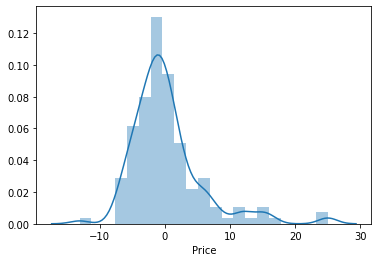

In [44]:
#Plot using seaborn
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

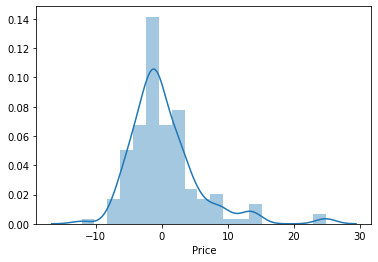

In [46]:
sns.distplot(y_test-prediction_ridge)